## Regression Trees

Descrevendo brevemente, pode-se dizer que a árvore de regressão é construída a partir dos seguintes passos:
1. Dividimos o espaço de predições, ou seja, o conjunto de possíveis valores $X_1, X_2, \ldots, X_p$ em $J$ partes distintas e sem *overlap* chamadas $R_1, \ldots, R_J$
2. Para cada observação que caia na região $R_j$, nós damos a mesma predição, que seria simplesmente a **média** dos valores em treinamento na região $R_j$.

### Como são construídas as regiões $R_j$ ?
O objetivo é traçar hiperplanos retangulares que separam os dados de forma a obter o menor erro, minimizando o $RSS$, ou seja:

$$min(RSS), \text{sendo }RSS = \sum_{j=1}^{J}\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$$
com $\hat{y}_{R_j}$ sendo a média dos valores dos dados de treinamento na região $R_j$

Na prática, é impossível criar todas as combinações de divisões possíveis e calcular o $RSS$ para ver qual tem o menor resultado. Dessa forma, é tomada uma abordagem *top-down* e *greedy* chamada **Recursive Binary Splitting**. Ela é chamada *top-down* por iniciar no topo da árvore e ramificando depois, e é chamada de gulosa pois a decisão de como dividir a árvore é tomada em cada etapa focando somente na iteração atual, sem olhar passos posteriores para a tomada de decisão.

Passos do **Recursive Binary Splitting**:
1. Primeiro é selecionada a feature $X_j$ e o *cutpoint* *s* tal que a separação seja a melhor possível levando em conta a minimização do $RSS$, e essa separação é sempre gerando outras duas regiões, de tal forma que o erro é dado por:

$$\sum_{x_i \in R_1(j, s)}(y_i - \hat{y}_{R_1})^2  + \sum_{x_i \in R_2(j, s)}(y_i - \hat{y}_{R_2})^2$$

Sendo:
$\hat{y}_{R_1}:$ média dos valores da região 1 delimitada pela feature $j=1$ e cutpoint $s$.

2. Repete o passo 1 mas com a próxima feature até a condição de parada, ou também até nenhuma região conter mais de 5 observações.

### Tree Pruning (Poda)
É uma técnica comum para poder tratar casos de overfitting. Uma árvore menor com menos divisões pode levar a um modelo mais interpretável pelo custo de um pequeno bias.
Uma alternativa também é realizar as divisões em 2 regiões somente quando a **diminuição do $RSS$** ultrapassa um limiar mínimo definido.

Na prática, o que ocorre é crescer uma grande árvore $T_0$ e podar ela de volta de forma a ter uma subárvore.
#### Cost Complexity Pruning
Basicamente é colocada a quantidade de nós (ou regiões) de uma árvore na mesma conta que cálcula o RSS total juntamente com um parâmetro $\alpha > 0$, de tal forma que  cada valor de $\alpha$ corresponde a uma subárvore $T \subset T_0$ tal que buscamos minimizar a seguinte soma:

$$\sum_{m=1}^{|T|} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$
Sendo:
- $|T|$: o número de nós terminais da árvore (ou número de regiões);
- $y_i$: valor *target* para a amostra $i$;
- $\hat{y}_{R_m}$: valor predito pelo modelo na região $R_m$.

### Passos para construção da árvore de regressão

1. Usar o processo recursivo de split durante o crescimento da árvore, parando somente quando alguma divisão ficar com menos que um número mínimo de observações definido por você;
2. Aplicar o conceito de **Cost Complexity pruning** para obter uma sequência de "melhores subárvores", como uma função do parâmetro $\alpha$
3. Usar **K-fold cross validation** para escolher $\alpha$. Isso é, dividir os dados de treinamento em $K$ partes, e para cada $k = 1, 2, \ldots, K$:
    - (a) Repetir os passos 1 e 2 em todos com exceção do k-ésimo fold dos dados de treino
    - (b) Calcular o MSE sobre os dados que foram deixados de lado (o k-ésimo fold) como uma função de $\alpha$
    Calcule a média dos resultados para cada valor de $\alpha$ e escolha $\alpha$ que minimize o erro médio
4.  Retorne a subárvore do passo 2 que corresponde ao valor escolhido de $alpha$.

# Caso simples

In [1]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing

# Dados de exemplo
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árvore de regressão
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Avaliação
y_pred = tree.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")

# Importância das features
feature_importance = tree.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Feature {data.feature_names[i]}: {importance:.3f}")

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


R²: 0.510
MSE: 0.642
Feature MedInc: 0.854
Feature HouseAge: 0.000
Feature AveRooms: 0.027
Feature AveBedrms: 0.000
Feature Population: 0.000
Feature AveOccup: 0.119
Feature Latitude: 0.000
Feature Longitude: 0.000


# Caso ideal

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Profundidade da árvore grande: 12
Número de nós da árvore grande: 127
Melhor alpha: 31.051581
MSE no teste: 5736.1062
Profundidade da melhor árvore: 10
Número de nós da melhor árvore: 64


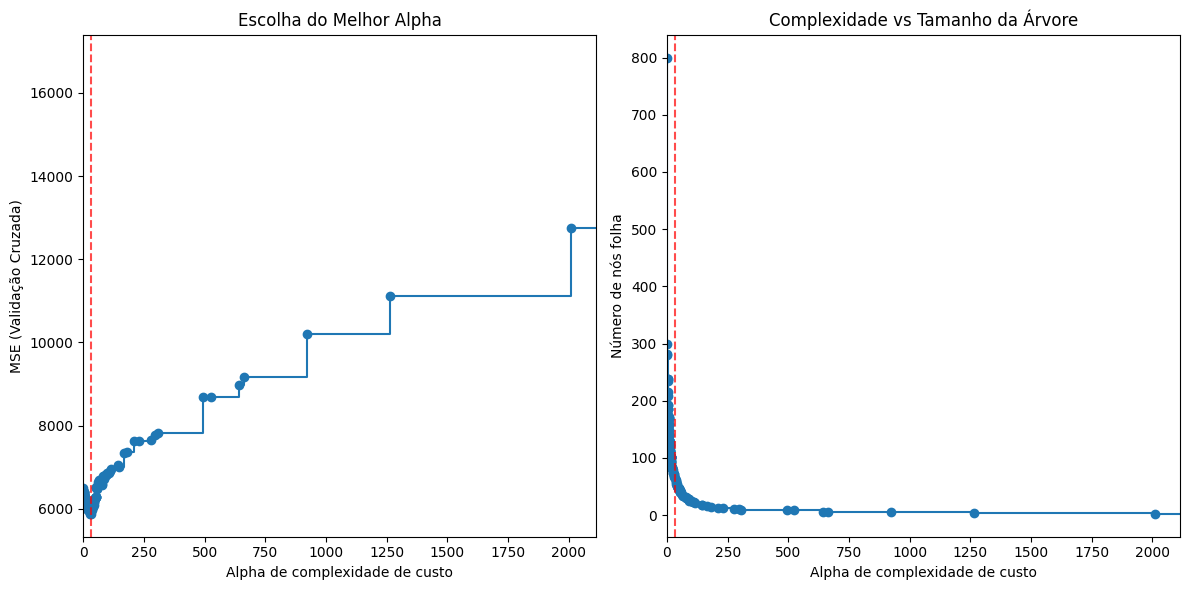


Comparação:
MSE da árvore grande (não podada): 5201.2676
MSE da árvore podada: 5736.1062
Redução de overfitting: -10.3%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# 1. Gerar dados de exemplo
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# 2. Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Passo 1: Construir uma árvore grande (sem podar)
large_tree = DecisionTreeRegressor(
    min_samples_leaf=5,  # Critério de parada: mínimo de observações por nó terminal
    random_state=42
)
large_tree.fit(X_train, y_train)

print(f"Profundidade da árvore grande: {large_tree.get_depth()}")
print(f"Número de nós da árvore grande: {large_tree.get_n_leaves()}")

# 4. Passo 2: Obter sequência de subárvores podadas
# O sklearn já faz a podagem por complexidade de custo internamente
# Vamos obter os valores de alpha (parâmetro de complexidade)
path = large_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Criar uma árvore para cada alpha
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train, y_train)
    trees.append(tree)

# 5. Passo 3: Usar Validação Cruzada K-Fold para escolher o melhor alpha
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_scores = []

for ccp_alpha in ccp_alphas:
    fold_scores = []
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Treinar árvore com alpha específico
        tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
        tree.fit(X_fold_train, y_fold_train)
        
        # Avaliar no fold de validação
        y_pred = tree.predict(X_fold_val)
        mse = mean_squared_error(y_fold_val, y_pred)
        fold_scores.append(mse)
    
    # Média do MSE através dos folds
    alpha_scores.append(np.mean(fold_scores))

# Encontrar o melhor alpha (com menor MSE)
best_alpha_index = np.argmin(alpha_scores)
best_alpha = ccp_alphas[best_alpha_index]

# 6. Passo 4: Retornar a melhor subárvore
best_tree = trees[best_alpha_index]

# 7. Avaliar no conjunto de teste
y_pred_test = best_tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Melhor alpha: {best_alpha:.6f}")
print(f"MSE no teste: {test_mse:.4f}")
print(f"Profundidade da melhor árvore: {best_tree.get_depth()}")
print(f"Número de nós da melhor árvore: {best_tree.get_n_leaves()}")

# 8. Visualizar resultados
plt.figure(figsize=(12, 6))

# Gráfico 1: MSE vs Alpha
plt.subplot(1, 2, 1)
plt.plot(ccp_alphas, alpha_scores, marker='o', drawstyle="steps-post")
plt.axvline(best_alpha, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Alpha de complexidade de custo')
plt.ylabel('MSE (Validação Cruzada)')
plt.title('Escolha do Melhor Alpha')
plt.xlim([0, max(ccp_alphas) * 0.5])  # Zoom na região relevante

# Gráfico 2: Comparação de tamanho das árvores
plt.subplot(1, 2, 2)
tree_sizes = [tree.get_n_leaves() for tree in trees]
plt.plot(ccp_alphas, tree_sizes, marker='o', drawstyle="steps-post")
plt.axvline(best_alpha, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Alpha de complexidade de custo')
plt.ylabel('Número de nós folha')
plt.title('Complexidade vs Tamanho da Árvore')
plt.xlim([0, max(ccp_alphas) * 0.5])

plt.tight_layout()
plt.show()

# 9. Comparar com árvore não podada
large_tree_test_mse = mean_squared_error(y_test, large_tree.predict(X_test))
print(f"\nComparação:")
print(f"MSE da árvore grande (não podada): {large_tree_test_mse:.4f}")
print(f"MSE da árvore podada: {test_mse:.4f}")
print(f"Redução de overfitting: {((large_tree_test_mse - test_mse) / large_tree_test_mse * 100):.1f}%")